In [3]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
import numpy as np
import tensorflow as tf
import datetime
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.optimizers import SGD
# fix dimension ordering issue
from keras import backend as K
K.set_image_data_format('channels_last')

In [4]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0],28,28,1))
testX = testX.reshape((testX.shape[0],28,28,1))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [5]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
num_classes = testY.shape[1]

In [6]:
def simple_CNN():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28,28,1), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [7]:
## build the model
model = simple_CNN()
# Fit the model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)

Epoch 1/10
300/300 - 18s - loss: 1.8625 - accuracy: 0.8568 - val_loss: 0.1351 - val_accuracy: 0.9618
Epoch 2/10
300/300 - 16s - loss: 0.1282 - accuracy: 0.9641 - val_loss: 0.0820 - val_accuracy: 0.9764
Epoch 3/10
300/300 - 16s - loss: 0.0789 - accuracy: 0.9770 - val_loss: 0.0752 - val_accuracy: 0.9786
Epoch 4/10
300/300 - 16s - loss: 0.0548 - accuracy: 0.9836 - val_loss: 0.0623 - val_accuracy: 0.9811
Epoch 5/10
300/300 - 16s - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0594 - val_accuracy: 0.9830
Epoch 6/10
300/300 - 16s - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0557 - val_accuracy: 0.9837
Epoch 7/10
300/300 - 16s - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.0596 - val_accuracy: 0.9839
Epoch 8/10
300/300 - 16s - loss: 0.0280 - accuracy: 0.9911 - val_loss: 0.0556 - val_accuracy: 0.9841
Epoch 9/10
300/300 - 16s - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0619 - val_accuracy: 0.9846
Epoch 10/10
300/300 - 16s - loss: 0.0218 - accuracy: 0.9928 - val_loss: 0.0656 - val_accura

In [8]:
model.summary()
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
__________________________________________________

### Evaluation of model

In [9]:
y_pred = model.predict(testX)
y_pred = np.argmax(np.round(y_pred),axis=1)

In [10]:
import numpy as np
testY=np.argmax(testY, axis=1)
testY[1]

2

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - testY)))
print("Mean sum of squares (MSE): %.2f" % np.mean((y_pred - testY)** 2))
rmse = np.sqrt(np.mean((y_pred - testY)** 2))
print("RMSE: %.2f%%" % rmse)
print("R2-score: %.2f" % r2_score(y_pred, testY))
print("Larger CNN Error: %.2f%%" % (100-scores[1]*100))

Mean absolute error: 0.07
Mean sum of squares (MSE): 0.38
RMSE: 0.62%
R2-score: 0.95
Larger CNN Error: 1.53%


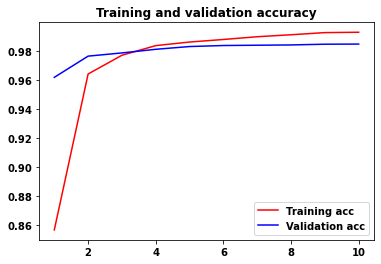

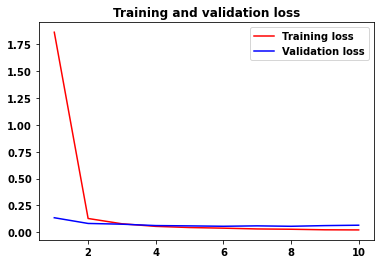

In [12]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

pyplot.title('Training and validation accuracy')
pyplot.plot(epochs, acc, 'red', label='Training acc')
pyplot.plot(epochs, val_acc, 'blue', label='Validation acc')
pyplot.legend()

pyplot.figure()
pyplot.title('Training and validation loss')
pyplot.plot(epochs, loss, 'red', label='Training loss')
pyplot.plot(epochs, val_loss, 'blue', label='Validation loss')

pyplot.legend()

pyplot.show()